# XGBoost Implementation for the Toxic Comment Detector

In [92]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from sklearn.metrics import classification_report

In [69]:
TRAIN_DATA_PATH = "Data/train.csv.zip"
TEST_DATA_PATH = "Data/test.csv.zip"
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
comment_col = 'comment_text'
target_names = ['Non-Toxic', 'Toxic']

In [53]:
train = pd.read_csv(TRAIN_DATA_PATH)
test = pd.read_csv(TEST_DATA_PATH)

In [54]:
def text_hot_encoding(X):
    label_encoder = LabelEncoder()
    label_encoder = label_encoder.fit(X)
    label_encoded_x = label_encoder.transform(X)
    return label_encoded_x

In [74]:
X = text_hot_encoding(train[comment_col])
accuracy_dict = dict()
seed = 7
test_size = 0.33

for i in range(len(label_cols)):
    Y = train[label_cols[i]]
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train[:,np.newaxis],y_train)
    
    #testing with X_test data
    X_test = text_hot_encoding(X_test)
    
    # make predictions for test data
    y_pred = model.predict(X_test[:,np.newaxis])
    
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print(classification_report(y_test, predictions, target_names=target_names))
    
    print("\nAccuracy with label", label_cols[i], str(accuracy * 100.0))
    print("-------------------------------------------------------\n")
    
    accuracy_dict[label_cols[i]] = accuracy


             precision    recall  f1-score   support

  Non-Toxic       0.90      1.00      0.95     47611
      Toxic       0.00      0.00      0.00      5048

avg / total       0.82      0.90      0.86     52659


Accuracy with label toxic 90.40050133880248
-------------------------------------------------------

             precision    recall  f1-score   support

  Non-Toxic       0.99      1.00      0.99     52134
      Toxic       0.00      0.00      0.00       525

avg / total       0.98      0.99      0.99     52659


Accuracy with label severe_toxic 99.0030194268786
-------------------------------------------------------

             precision    recall  f1-score   support

  Non-Toxic       0.95      1.00      0.97     49865
      Toxic       0.00      0.00      0.00      2794

avg / total       0.90      0.95      0.92     52659


Accuracy with label obscene 94.69416434037866
-------------------------------------------------------

             precision    recall  f1-scor

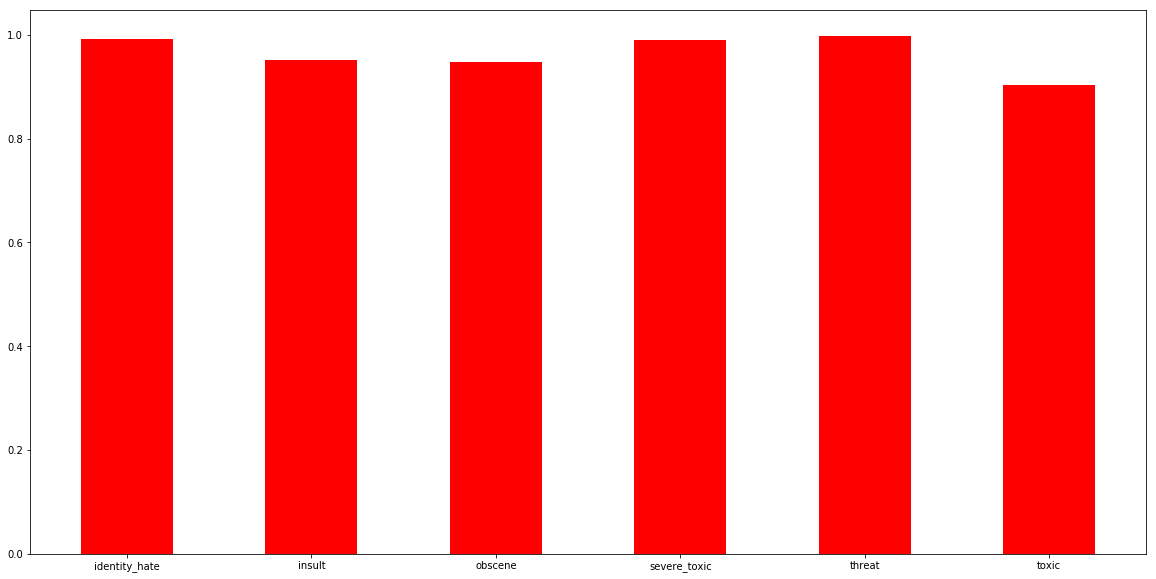

In [91]:
# Graphical representation of accuracy based on different y train labels

plt.figure(figsize=(20,10))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), 0.5, color='red')
plt.show()

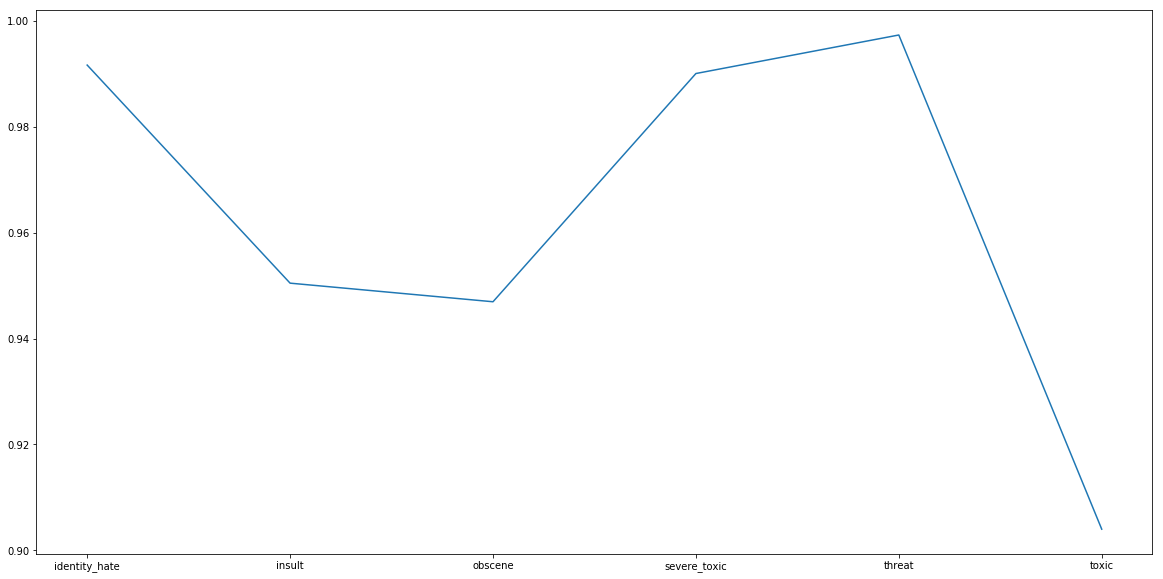

In [93]:
lists = sorted(accuracy_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plb.figure(figsize=(20,10))
plb.plot(x, y)
plb.show()